# 지도 학습 활용 알고리즘 이상 탐지

## 라이브러리/데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
label_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/U-WURF/사출성형_dataset/labeled_data.csv")

In [ ]:
label_data.head(3)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.5,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,0.0,0.0,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_data['EQUIP_NAME'].value_counts()

650톤-우진2호기    7992
1800TON-우진       2
650톤-우진          2
Name: EQUIP_NAME, dtype: int64

In [ ]:
label_data['PART_NAME'].value_counts()

CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, LH         628
RG3 MOLD'G W/SHLD, RH         628
SP2 CVR ROOF RACK CTR, RH       2
JX1 W/S SIDE MLD'G RH           2
Name: PART_NAME, dtype: int64

## 데이터 전처리

In [ ]:
label_data.columns

Index(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL',
       'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'PassOrFail', 'Reason',
       'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_3',
       'Mold_Temperature_4', 'Mold_Temperature_5', 'Mold_Temperature_6',
       'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9',
       'Mold_Temperature_10', 'Mold_Temperature_11', 

In [ ]:
def make_input(data, machine_name, product_name):
  machine_ = data['EQUIP_NAME'] == machine_name
  product_ = data['PART_NAME'] == product_name
  data = data[machine_ & product_]

  data.drop(['_id','TimeStamp', 'PART_FACT_PLAN_DATE', 'Reason', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5', 'Mold_Temperature_6',
       'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9',
       'Mold_Temperature_10', 'Mold_Temperature_11', 'Mold_Temperature_12'], axis=1, inplace=True)
  
  return data

In [ ]:
machine_name = "650톤-우진2호기"

product_name = ["CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH",  "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]

cn7lh = make_input(label_data, machine_name, product_name[0])
cn7rh = make_input(label_data, machine_name, product_name[1])
rg3lh = make_input(label_data, machine_name, product_name[2])
rg3rh = make_input(label_data, machine_name, product_name[3])

cn7 = pd.concat([cn7lh, cn7rh], ignore_index=True)
rg3 = pd.concat([rg3lh, rg3rh], ignore_index=True)

rg3.drop(['Plasticizing_Position'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 데이터 특성 파악

In [ ]:
cn7.head()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,Y,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
1,Y,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.6
2,Y,9.58,4.46,16.90,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.599998,30.900000,292.500000,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,0.0,67.500000,25.000000,27.6
3,Y,9.58,4.46,16.92,59.560001,7.13,653.409973,0.0,68.849998,647.98999,55.500000,30.600000,292.399994,141.800003,136.699997,37.400002,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,0.0,67.000000,25.000000,27.6
4,Y,9.57,4.45,16.91,59.520000,7.14,653.409973,0.0,68.830002,647.98999,55.700001,30.799999,292.500000,141.600006,136.399994,37.099998,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,0.0,66.699997,24.799999,27.5


In [ ]:
cn7['PassOrFail'] = cn7['PassOrFail'].replace('Y', 0).replace('N', 1)
cn7.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.0,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.0,6736.000000,6736.000000,6736.000000
mean,0.005790,9.580064,4.448425,16.820433,59.549314,7.113639,653.440859,0.0,68.381941,644.899046,55.523085,30.674674,125.583744,142.090559,136.518646,37.842132,59.347209,275.965024,275.134961,274.858091,270.285823,254.924346,229.971512,0.0,66.663094,22.074228,23.473619
std,0.075876,0.180526,0.140286,0.288946,0.372267,0.075843,0.115004,0.0,0.648307,42.170577,1.005340,0.141148,126.836972,1.985764,0.754736,1.768085,3.530820,2.302366,1.887356,1.854329,2.018081,1.134566,0.428762,0.0,2.433782,1.171389,1.370780
min,0.000000,9.360000,3.350000,16.469999,58.840000,6.070000,653.390015,0.0,59.759998,69.639999,38.500000,30.299999,29.200001,140.699997,128.399994,21.700001,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,0.0,38.500000,19.100000,20.600000
25%,0.000000,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,0.0,68.320000,647.989990,55.099998,30.600000,29.200001,141.800003,136.300003,37.599998,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,0.0,65.599998,21.200001,22.600000
50%,0.000000,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,0.0,68.360001,647.989990,55.400002,30.700001,29.200001,141.899994,136.500000,37.900002,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,0.0,67.000000,21.900000,23.299999
75%,0.000000,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,0.0,68.510002,647.989990,55.900002,30.799999,292.399994,142.100006,136.800003,38.200001,59.700001,276.399994,275.500000,275.200012,271.100006,255.199997,230.100006,0.0,67.800003,22.799999,24.200001
max,1.000000,13.390000,8.270000,21.100000,64.349998,7.180000,655.000000,0.0,68.860001,647.989990,64.800003,31.200001,293.899994,169.100006,146.699997,75.199997,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,0.0,70.599998,25.299999,27.799999


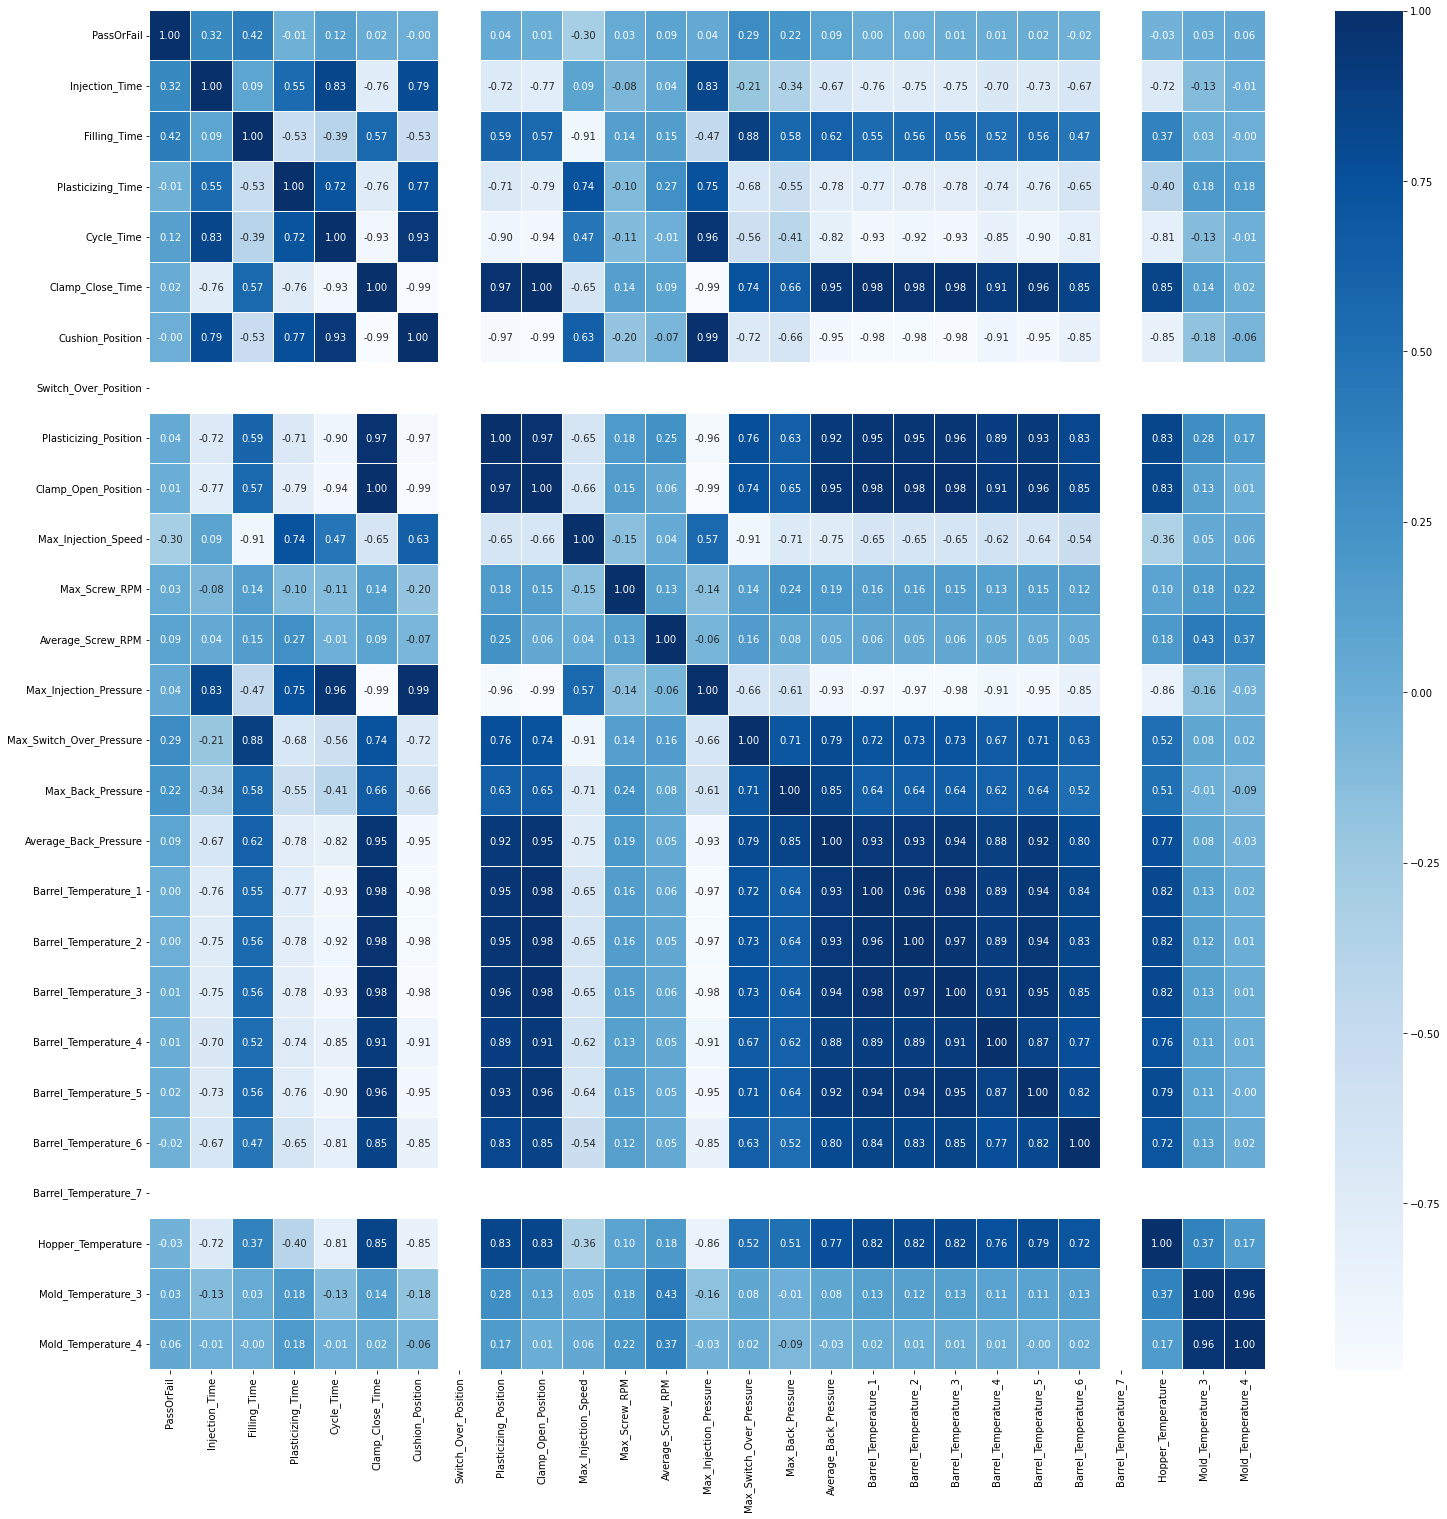

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(data=cn7.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')

ValueError: ignored

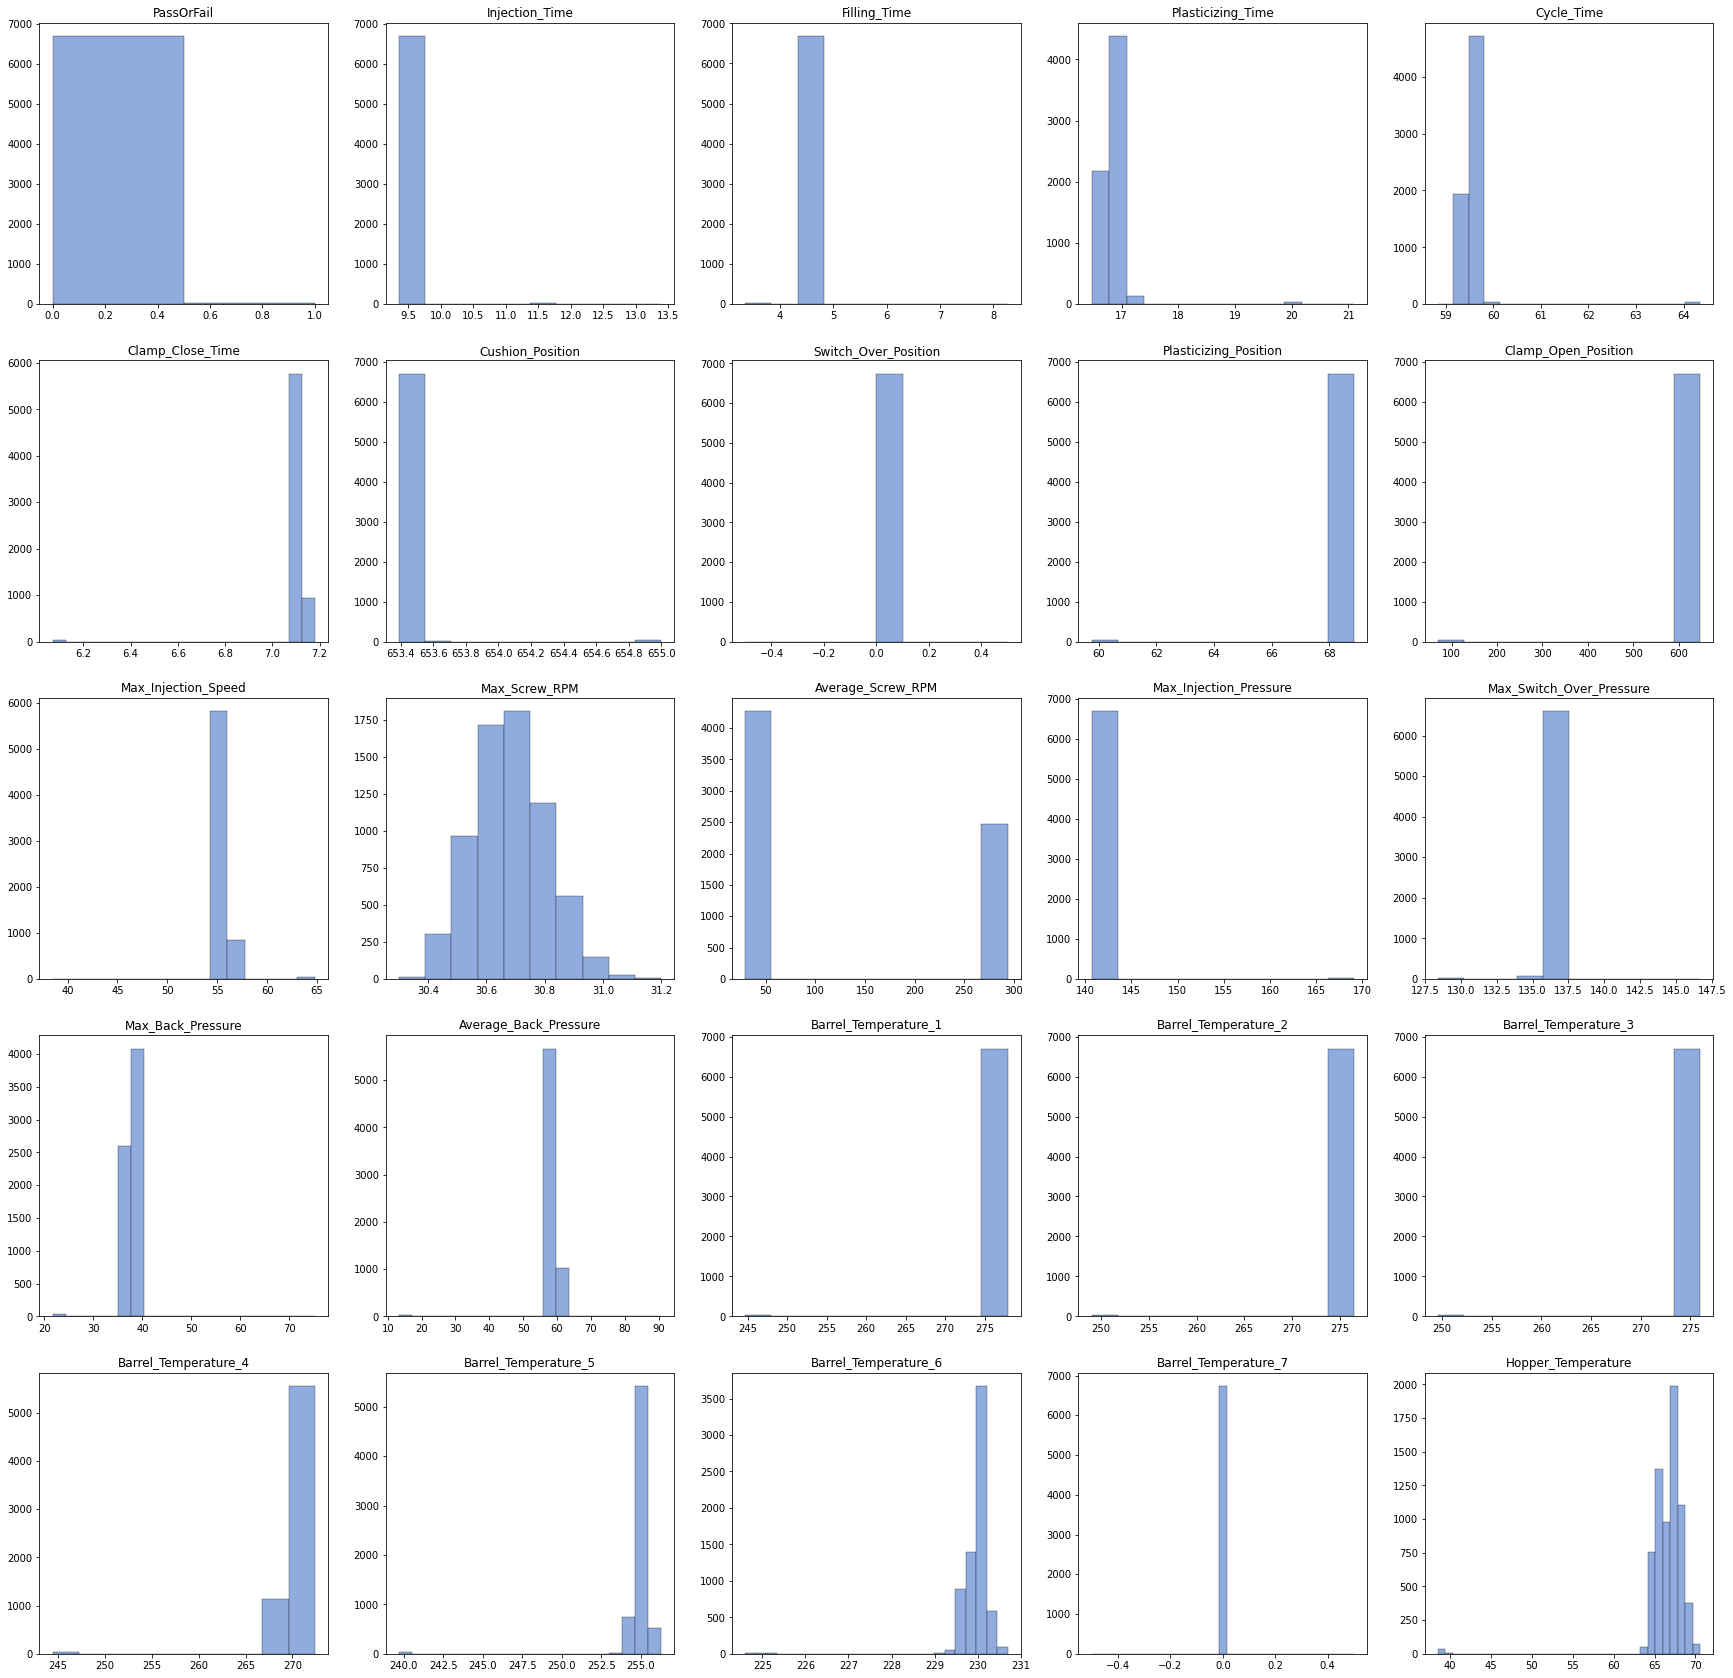

In [ ]:
# 제품별 히스토그램 확인
plt.figure(figsize=(30,30))

bin = [2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,20,10,10,10,10,20,25,35,35]

for index,value in enumerate(cn7):
  sub = plt.subplot(5, 5, index+1)
  sub.hist(cn7[value], bins = bin[index], facecolor = (144/255, 171/255, 221/255), linewidth=.3, edgecolor='black')
  plt.title(value)

## 학습/평가 데이터 분리

In [ ]:
# 잡음제거 오토인코더에는 정상 데이터만 학습시킴!
cn7_Y = cn7[cn7['PassOrFail'] == 0]
cn7_N = cn7[cn7['PassOrFail'] == 1]

print(len(cn7_Y))
print(len(cn7_N))

6697
39


In [ ]:
# 잡음제거 오토인코더 모델에 학습시킬 데이터의 형태는 클래스 변수가 없어야 함
cn7_Y.drop(['PassOrFail'], axis=1, inplace=True)
cn7_N.drop(['PassOrFail'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
scaler = MinMaxScaler()
cn7_Y = scaler.fit_transform(cn7_Y)
cn7_N = scaler.fit_transform(cn7_N)

In [ ]:
cn7_train_Y = cn7_Y[:4000]
cn7_test_Y = cn7_Y[4000:]

cn7_test_N = cn7_N

## 오토인코더 모델 구축

In [ ]:
# 인코더
dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation='relu'),
    Dense(5, activation='relu')
])

# 디코더
dropout_decoder = Sequential([
    Dense(15, activation='relu', input_shape=[5]),
    Dense(cn7_train_Y.shape[1], activation='relu'),
])

dropout_AE = Sequential([dropout_encoder, dropout_decoder])

In [ ]:
dropout_AE.compile(loss="mse", optimizer=Adam(lr=0.01), metrics=['accuracy'])

history = dropout_AE.fit(cn7_train_Y, cn7_train_Y, batch_size=30, epochs=30, validation_split=0.2, callbacks=[EarlyStopping(monitor="val_loss", patience=7, mode='min')])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
107/107 [==============================] - 1s 5ms/step - loss: 0.1235 - accuracy: 0.2931 - val_loss: 0.0992 - val_accuracy: 0.9688
Epoch 2/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9681 - val_loss: 0.0969 - val_accuracy: 0.9688
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9837 - val_loss: 0.0949 - val_accuracy: 0.9688
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9853 - val_loss: 0.0943 - val_accuracy: 0.9688
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9850 - val_loss: 0.0941 - val_accuracy: 0.9688
Epoch 6/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9816 - val_loss: 0.0941 - val_accuracy: 0.9688
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9881 - val_loss: 0.0940 - val_accuracy: 0.9688
Epoch 

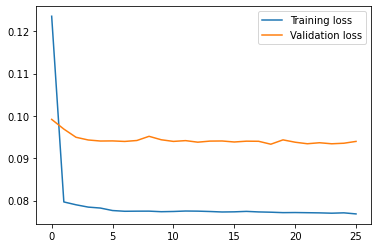

In [ ]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

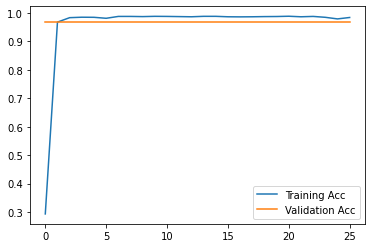

In [ ]:
plt.plot(history.history["accuracy"], label="Training Acc")
plt.plot(history.history["val_accuracy"], label="Validation Acc")
plt.legend()
plt.show()

## 임계값 정의 및 예측값과 복원 오차 확인

- 모델을 거치고 나온 양품 데이터와 불량 데이터의 복원 오차를 구별할 수 있는 임계치가 필요함(불량 데이터가 들어왔을 때에는 덜 복원해내므로 높은 복원 오차값 가짐)

In [ ]:
cn7_train_pred = dropout_AE.predict(cn7_train_Y)
cn7_train_loss = np.mean(np.square(cn7_train_pred - cn7_train_Y), axis=1)

threshold = np.mean(cn7_train_loss) + 5*np.std(cn7_train_loss)  # 5시그마 적용
print("복원 오류 임계치: ", threshold)

125/125 [==============================] - 0s 1ms/step
복원 오류 임계치:  0.1808217205192752


85/85 [==============================] - 0s 1ms/step


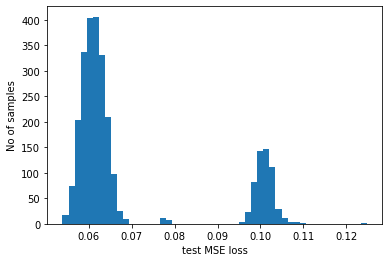

불량개수:  0


In [ ]:
# 복원 오차가 임계치보다 크면, 모델이 익숙하지 않은 패턴을 보고 있음을 유추 가능, 즉 불량이라고 판단
cn7_predict_Y = dropout_AE.predict(cn7_test_Y)
cn7_test_Y_mse = np.mean(np.square(cn7_predict_Y - cn7_test_Y), axis=1)

plt.hist(cn7_test_Y_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show()

cv7_test_Y_anomalies = cn7_test_Y_mse > threshold
print("불량개수: ", np.sum(cv7_test_Y_anomalies))

2/2 [==============================] - 0s 4ms/step


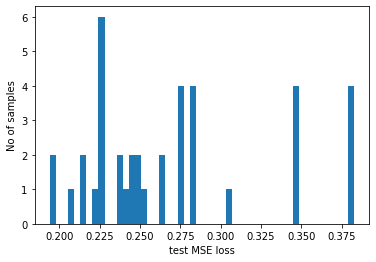

불량개수:  39


In [ ]:
cn7_predict_N = dropout_AE.predict(cn7_test_N)
cn7_test_N_mse = np.mean(np.square(cn7_predict_N - cn7_test_N), axis=1)

plt.hist(cn7_test_N_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show()

cv7_test_N_anomalies = cn7_test_N_mse > threshold
print("불량개수: ", np.sum(cv7_test_N_anomalies))

# 준지도 학습 활용 알고리즘

## 라이브러리/데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout

In [3]:
moldset_labeled = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/U-WURF/사출성형_dataset/moldset_labeled.csv", 
                              low_memory=False, index_col=False)

In [4]:
moldset_labeled['EQUIP_NAME'].value_counts()

650톤-우진2호기    2607
Name: EQUIP_NAME, dtype: int64

In [5]:
parts = ['86141AA000', '86131AA000', '86141T1000', '86131T1000']
moldset_labeled['PART_NO'].value_counts()

86141AA000    713
86131AA000    712
86131T1000    591
86141T1000    591
Name: PART_NO, dtype: int64

## 데이터 특성 파악

In [6]:
moldset_labeled.columns

Index(['Unnamed: 0', '_id', 'TimeStamp', 'PART_FACT_PLAN_DATE',
       'PART_FACT_SERIAL', 'PART_NO', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME',
       'PassOrFail', 'Reason', 'Injection_Time', 'Filling_Time',
       'Plasticizing_Time', 'Cycle_Time', 'Clamp_Close_Time',
       'Cushion_Position', 'Switch_Over_Position', 'Plasticizing_Position',
       'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_3',
       'Mold_Temperature_4', 'Mold_Temperature_5', 'Mold_Temperature_6',
       'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9',
       'Mold_Temperat

In [7]:
moldset_labeled.drop(columns={'_id', 'TimeStamp', 'PART_FACT_PLAN_DATE',
       'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'Reason', 'Mold_Temperature_1', 'Mold_Temperature_2',
        'Mold_Temperature_5', 'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9',
       'Mold_Temperature_10', 'Mold_Temperature_11', 'Mold_Temperature_12', 'Barrel_Temperature_7', 'Switch_Over_Position'}, inplace=True)

In [8]:
moldset_unlabeled = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/U-WURF/사출성형_dataset/unlabeled_data.csv", index_col=0)

moldset_unlabeled.drop(columns={'_id', 'TimeStamp', 'PART_FACT_PLAN_DATE',
       'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'ERR_FACT_QTY', 'Mold_Temperature_1', 'Mold_Temperature_2',
        'Mold_Temperature_5', 'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9',
       'Mold_Temperature_10', 'Mold_Temperature_11', 'Mold_Temperature_12', 'Barrel_Temperature_7', 'Switch_Over_Position'}, inplace=True)

In [9]:
# 원하는 제품 코드를 가지고 분리하여 따로 선언
moldset_labeled_cn7 = moldset_labeled[(moldset_labeled['PART_NO'] == '86131AA000') | (moldset_labeled['PART_NO'] == '86141AA000')]
moldset_labeled_cn7.drop(columns={'PART_NO'}, inplace=True)

moldset_labeled_rg3 = moldset_labeled[(moldset_labeled['PART_NO'] == '86131T1000') | (moldset_labeled['PART_NO'] == '86141T1000')]
moldset_labeled_rg3.drop(columns={'PART_NO'}, inplace=True)

moldset_unlabeled_cn7 = moldset_unlabeled[(moldset_unlabeled['PART_NO'] == '86131AA000') | (moldset_unlabeled['PART_NO'] == '86141AA000')]
moldset_unlabeled_cn7.drop(columns={'PART_NO'}, inplace=True)

moldset_unlabeled_rg3 = moldset_unlabeled[(moldset_unlabeled['PART_NO'] == '86131T1000') | (moldset_unlabeled['PART_NO'] == '86141T1000')]
moldset_unlabeled_rg3.drop(columns={'PART_NO'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 데이터 전처리

In [10]:
moldset_labeled_rg3['PassOrFail'] = moldset_labeled_rg3['PassOrFail'].map({0:int(0), 1:int(1)})
moldset_labeled_cn7['PassOrFail'] = moldset_labeled_cn7['PassOrFail'].map({0:int(0), 1:int(1)})

<ipython-input-10-e1d7598392fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moldset_labeled_rg3['PassOrFail'] = moldset_labeled_rg3['PassOrFail'].map({0:int(0), 1:int(1)})
<ipython-input-10-e1d7598392fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moldset_labeled_cn7['PassOrFail'] = moldset_labeled_cn7['PassOrFail'].map({0:int(0), 1:int(1)})


In [11]:
labeled_data = [moldset_labeled_cn7, moldset_labeled_rg3]

for d in labeled_data:
  print('양품 수: {}'.format(d[d['PassOrFail'] ==0].shape[0]))
  print('불량품 수: {}'.format(d[d['PassOrFail'] ==1].shape[0]))
  print("=====")

양품 수: 1398
불량품 수: 27
=====
양품 수: 1157
불량품 수: 25
=====


In [12]:
from sklearn.preprocessing import StandardScaler

data = [moldset_labeled_cn7, moldset_labeled_rg3, moldset_unlabeled_cn7, moldset_unlabeled_rg3]

for d in data:
  for column in d.columns:
    if column != 'PassOrFail':
      sc = StandardScaler()
      d[[column]] = sc.fit_transform(d[[column]])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

## 모델구축(SVC)

In [ ]:
# 학습된 모델이 예측하는 클래스별 확률값 중에서 큰 값의 절댓값을 반환하는 함수
def confident_prediction(df):
  result = []

  for i in range(len(df)):
    if df[i][0] >= df[i][1]:
      result.append(df[i][0])
    else:
      result.append(df[i][1])

  return result

In [16]:
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score, confusion_matrix

def evaluation(y, y_pred):
  print("Accuracy: {:.2f}".format(accuracy_score(y,y_pred)))
  print("Precision: {:.2f}".format(precision_score(y,y_pred)))
  print("Recall: {:.2f}".format(recall_score(y,y_pred)))
  print(roc_auc_score(y,y_pred))
  print(f1_score(y,y_pred))
  print(confusion_matrix(y,y_pred))

In [15]:
class DataLoader():
  def __init__(self):
    moldset_labeled = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/U-WURF/사출성형_dataset/moldset_labeled_cn7.csv",
                                  low_memory=False, index_col=False)
    moldset_labeled.drop(columns={"Unnamed: 0"}, inplace=True)
    moldset_unlabeled = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/U-WURF/사출성형_dataset/moldset_unlabeled_cn7.csv',
                                    low_memory=False, index_col=False)
    moldset_unlabeled.drop(columns={"Unnamed: 0"}, inplace=True)

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

    for train_index, test_index in sss.split(moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'], moldset_labeled['PassOrFail']):
      moldset_labeled_train_X = moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'].iloc[train_index]
      moldset_labeled_test_X = moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'].iloc[test_index]
      moldset_labeled_train_Y = moldset_labeled['PassOrFail'].iloc[train_index]
      moldset_labeled_test_Y = moldset_labeled['PassOrFail'].iloc[test_index]

    
    self.moldset_labeled_train_X = moldset_labeled_train_X
    self.moldset_labeled_test_X = moldset_labeled_test_X
    self.moldset_labeled_train_Y = moldset_labeled_train_Y
    self.moldset_labeled_test_Y = moldset_labeled_test_Y
    self.moldset_unlabeled = moldset_unlabeled

In [ ]:
# 클래스 변수가 존재하는 데이터만 사용하여 준지도 학습 모델에 사용될 하위모델의 하이퍼 파라미터 조정

from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.svm import SVC

tuned_parameters = [{'kernel':['rbf'], 'gamma':[i*1e-4 for i in range(1,100)], 'C':[i*1e-4 for i in range(1,100)]}]
scores = ['accuracy', 'precision', 'recall']
weights = {0:100.0, 1:1.0}

kf = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)
X = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/U-WURF/사출성형_dataset/moldset_labeled_cn7.csv",
                                  low_memory=False, index_col=False)
X.drop(columns={"Unnamed: 0"}, inplace=True)
y = X.pop('PassOrFail')

for score in scores:
  clf = GridSearchCV(SVC(class_weight=weights), scoring=score, param_grid = tuned_parameters, n_jobs=-1, cv=kf, refit=True, verbose=0)
  clf.fit(X,y)
  print('베스트 파라미터 : {}'.format(clf.best_params_))

베스트 파라미터 : {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
베스트 파라미터 : {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
베스트 파라미터 : {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
def train_and_evaluate(percentage=10, unlabeled_usage=90):
  data = DataLoader()
  X_test = data.moldset_labeled_test_X
  Y_test = data.moldset_labeled_test_Y
  X_with_label = data.moldset_labeled_train_X
  Y_with_label = data.moldset_labeled_train_Y
  moldset_unlabeled = data.moldset_unlabeled
  without_label = moldset_unlabeled

  num_left_unlabeled = int(moldset_unlabeled.shape[0]*(100-unlabeled_usage)*0.01)

  while True:
    if without_label.shape[0] >= num_left_unlabeled:
      weights = {0:100.0, 1:1.0}

      model = SVC(C=0.001, kernel='rbf', gamma=1e-2, class_weight=weights, probability=True, random_state=42)
      model.fit(X_with_label, Y_with_label)
      y_pred = model.predict(X_test)
      evaluation(Y_test, y_pred)

      prob = model.predict_proba(without_label)
      confident_prob = confident_prediction(prob)
      confident_prediction(prob)
      without_label['confidence'] = confident_prob

      without_label = without_label.sort_values(by=['confidence'], ascending=False)
      length = without_label.shape[0]
      cutting_index = int(length*(percentage*0.01))
      chosen_without_label = without_label.iloc[:cutting_index,:]
      chosen_without_label.drop(columns={'confidence'}, inplace=True)
      notchosen_without_label = without_label.iloc[cutting_index:,:].drop(columns={'confidence'})
      pseudo_label = pd.DataFrame(model.predict(chosen_without_label))

      X_with_label = pd.concat([X_with_label, chosen_without_label])
      Y_with_label = pd.concat([Y_with_label, pseudo_label])
      without_label = notchosen_without_label
      y_pred = model.predict(X_test)
      evaluation(Y_test, y_pred)

    else:
      print()
      print("All done, unlabeled used: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
      break

In [ ]:
train_and_evaluate()

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined 

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A col

Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]
Accuracy: 0.99
Precision: 0.00
Recall: 0.00
0.5
0.0
[[359   0]
 [  5   0]]

All done, unlabeled used: 99%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 모델구축(심층신경망)

In [1]:
# 심층신경망의 최종 출력은 확률값이기 때문에, 클래스 변수로 바꾸어주는 함수 만들기
def predict(df):
  result = []

  for i in range(len(df)):
    if df[i] >= 0.5:
      result.append(1)
    else:
      result.append(0)
    
  return result

In [18]:
def train_and_evaluate(percentage=10, unlabeled_usage=90):
  data = DataLoader()
  X_test = data.moldset_labeled_test_X
  Y_test = data.moldset_labeled_test_Y
  X_with_label = data.moldset_labeled_train_X
  Y_with_label = data.moldset_labeled_train_Y
  moldset_unlabeled = data.moldset_unlabeled
  without_label = moldset_unlabeled

  num_left_unlabeled = int(moldset_unlabeled.shape[0]*(100-unlabeled_usage)*0.01)

  model = Sequential()

  model.add(Dense(units=32, activation='relu', input_dim=24))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(units=32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units=16, activation='relu'))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'),
                                                     tf.keras.metrics.Recall(name='recall')])
  
  while True:
    if without_label.shape[0] >= num_left_unlabeled:

      val_precision = 0
      val_recall = 0
      patience = 10
      cnt = 0

      # patience로 설정한 에폭의 수만큼 검증 데이터셋에 대한 평가에서의 정밀도와 재현율의 개선이 이루어지지 않으면
      # 이후 단계로 넘어가게 되고, 개선이 이루어지면 최대 100 에폭까지 학습이 진행됨.
      for epoch in range(100):
        history = model.fit(X_with_label, Y_with_label, epochs=1, validation_split=0.3)
        history = history.history

        if cnt >= patience:
          break
        
        if history['val_precision'][0] >= val_precision and history['val_recall'][0] >= val_recall:
          val_precision = history['val_precision'][0]
          val_recall = history['val_recall'][0]
          cnt = 0

        else:
          cnt += 1

      
      prob = model.predict_proba(without_label)
      confident_prob = predict(prob)
      without_label['confidence'] = confident_prob
      without_label = without_label.sort_values(by=['confidence'], ascending=False)
      length = without_label.shape[0]
      cutting_index = int(length*(percentage*0.01))
      chosen_without_label = without_label.iloc[:cutting_index,:]
      chosen_without_label.drop(columns={'confidence'}, inplace=True)
      notchosen_without_label = without_label.iloc[cutting_index:,:].drop(columns={'confidence'})
      pseudo_label = pd.DataFrame(predict(model.predict(chosen_without_label)))

      X_with_label = pd.concat([X_with_label, chosen_without_label])
      Y_with_label = pd.concat([Y_with_label, pseudo_label])
      without_label = notchosen_without_label

    else:
      print()
      print("All done, unlabeled used: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
      break

In [19]:
train_and_evaluate()

19/19 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2397 - val_accuracy: 0.9804 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


AttributeError: ignored